<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/Desafio_rotatividade_RRHH_clasifica%C3%A7ao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar el dataset
df = pd.read_excel("/content/Base_dados - Rotatividade RH (1).xlsx")

In [57]:
# Inspección inicial
print(df.head())


  Data_Contratacao Data_Desligamento  Meses_de_Servico  Idade  \
0       2024-02-14               NaT                 3     24   
1       2023-11-16        2024-05-14                 6     43   
2       2023-11-16               NaT                 6     45   
3       2023-05-20               NaT                12     31   
4       2022-07-24               NaT                22     37   

   Pontuacao_Desempenho  Satisfacao_Trabalho Nivel_Cargo  Salario  \
0              2.066788             2.043644       Pleno  4994.41   
1              3.256257             1.711719      Sênior  8798.34   
2              4.827732             3.480214      Sênior  8891.02   
3              1.453944             1.617558       Pleno  7606.22   
4              2.088917             2.763390      Sênior  9236.03   

   Horas_Extras  Desligamento  
0     15.465241             0  
1     19.036627             1  
2     13.326408             0  
3     14.209663             0  
4     11.059687             0  


In [58]:
print(df.describe())


                    Data_Contratacao    Data_Desligamento  Meses_de_Servico  \
count                            650                  144        650.000000   
mean   2022-10-31 06:38:46.153846272  2024-05-14 00:00:00         18.690769   
min              2021-06-29 00:00:00  2024-05-14 00:00:00          3.000000   
25%              2022-02-24 00:00:00  2024-05-14 00:00:00         10.000000   
50%              2022-10-22 00:00:00  2024-05-14 00:00:00         19.000000   
75%              2023-07-19 00:00:00  2024-05-14 00:00:00         27.000000   
max              2024-02-14 00:00:00  2024-05-14 00:00:00         35.000000   
std                              NaN                  NaN          9.652262   

            Idade  Pontuacao_Desempenho  Satisfacao_Trabalho       Salario  \
count  650.000000            650.000000           650.000000    650.000000   
mean    28.349231              3.027463             2.940577   6131.587062   
min     18.000000              1.000242             1.

In [59]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 50.9+ KB
None
Data_Contratacao          0
Data_Desligamento       506
Meses_de_Servico          0
Idade                     0


In [60]:
# Crear columna 'Desligado'
df['Desligado'] = df['Data_Desligamento'].notnull().astype(int)

# Eliminar columnas no necesarias
df = df.drop(columns=['Data_Contratacao', 'Desligamento'])

In [61]:
df.head()

,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligado
0,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0


In [62]:
# Estadísticas iniciales
media_idade = df['Idade'].mean()
media_salario= df['Salario'].mean()
print('a idade media e: {:.0f} anos '.format(media_idade))
print('a media salarial e de: R${:.2f}'.format(media_salario))

a idade media e: 28 anos 
a media salarial e de: R$6131.59


In [63]:

meses_serviço= df['Meses_de_Servico'].max()
print('o max de meses de serviço registrado e de:',meses_serviço)
meses_serviço= df['Meses_de_Servico'].mean()
print('a media de meses_serviço geral e de: {:.2f}'.format(meses_serviço))

o max de meses de serviço registrado e de: 35
a media de meses_serviço geral e de: 18.69


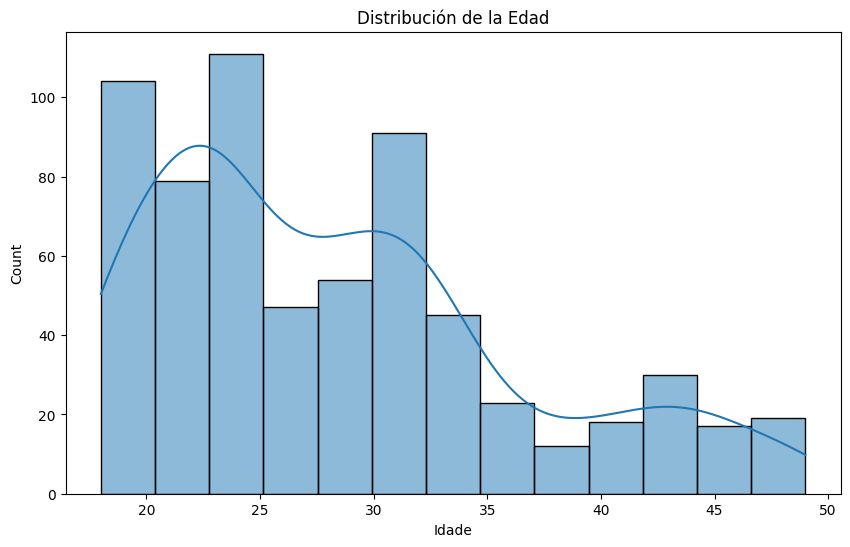

In [64]:
# Visualizaciones
plt.figure(figsize=(10, 6))
sns.histplot(df['Idade'], kde=True)
plt.title('Distribución de la Edad')
plt.show()

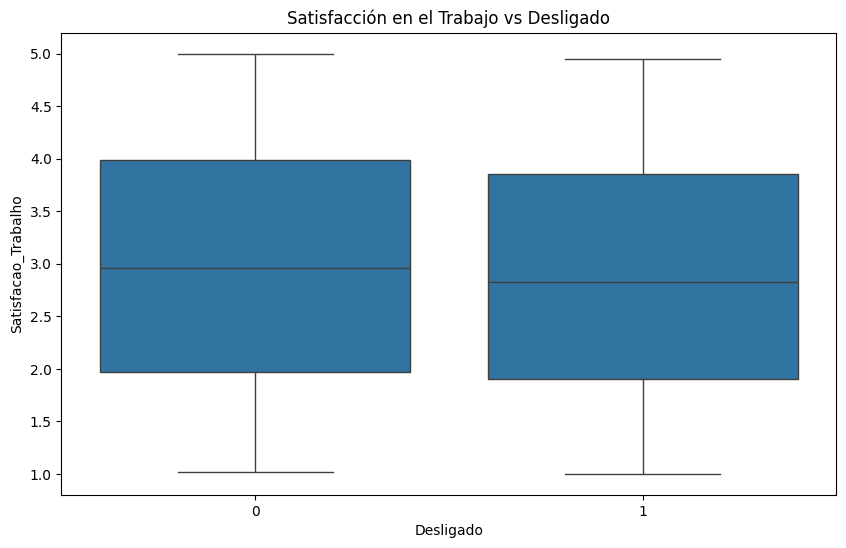

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Desligado', y='Satisfacao_Trabalho', data=df)
plt.title('Satisfacción en el Trabajo vs Desligado')
plt.show()

In [66]:

# Rango de idade más común y quantidade de demitidos
rango_idade_comun = df['Idade'].mode()[0]
quantidade_demitidos = df[df['Idade'] == rango_idade_comun].shape[0]
print(f"Rango de idade más común: {rango_idade_comun}")
print(f"Quantidade de demitidos no rango: {quantidade_demitidos}")

Rango de idade más común: 24
Quantidade de demitidos no rango: 50


In [67]:
# Selección de características y variable objetivo
X = df.drop(columns=['Desligado'])
y = df['Desligado']


In [70]:
# Verificar los tipos de datos en X
print(X.dtypes)

# Eliminar columnas de tipo datetime si existen
X = X.select_dtypes(exclude=['datetime64[ns]'])

Data_Desligamento       datetime64[ns]
Meses_de_Servico                 int64
Idade                            int64
Pontuacao_Desempenho           float64
Satisfacao_Trabalho            float64
Salario                        float64
Horas_Extras                   float64
Nivel_Cargo_Pleno                 bool
Nivel_Cargo_Sênior                bool
dtype: object


In [71]:
# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

In [72]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento del modelo Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Accuracy: 0.7025641025641025
Confusion Matrix:
 [[124  28]
 [ 30  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       152
           1       0.32      0.30      0.31        43

    accuracy                           0.70       195
   macro avg       0.56      0.56      0.56       195
weighted avg       0.70      0.70      0.70       195



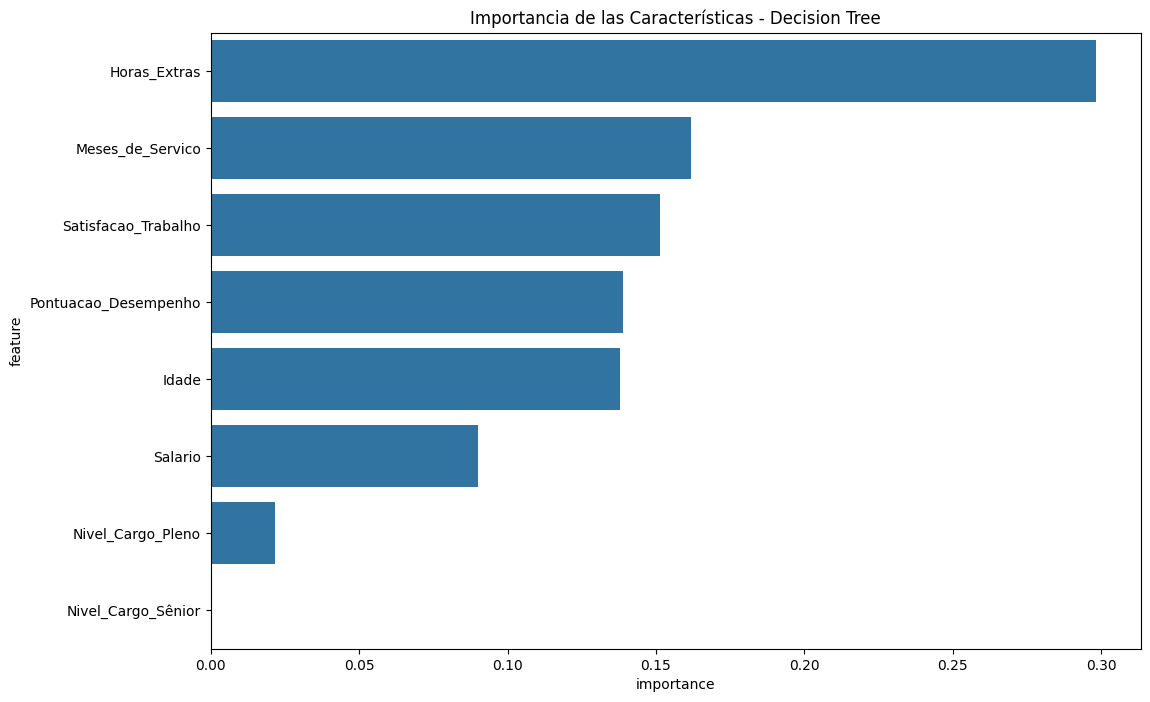

In [74]:
# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importancia de las Características - Decision Tree')
plt.show()


# regresion logistica

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Accuracy: 0.8051282051282052
Confusion Matrix:
 [[152   0]
 [ 38   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       152
           1       1.00      0.12      0.21        43

    accuracy                           0.81       195
   macro avg       0.90      0.56      0.55       195
weighted avg       0.84      0.81      0.74       195



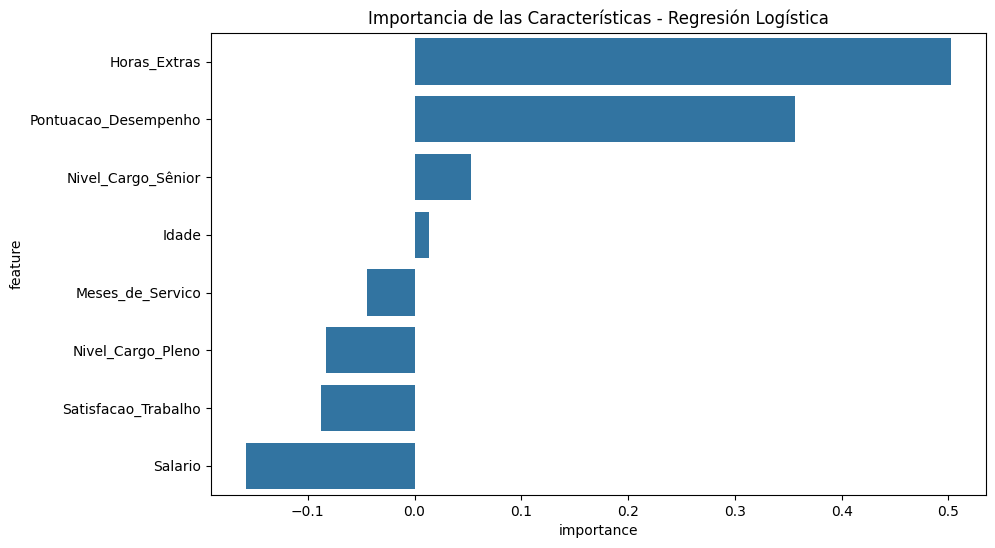

In [76]:
# Crear y entrenar el modelo de Regresión Logística
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_logreg = logreg_model.predict(X_test)

# Evaluar el modelo
print('Accuracy:', accuracy_score(y_test, y_pred_logreg))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_logreg))
print('Classification Report:\n', classification_report(y_test, y_pred_logreg))

# Importancia de las características
importances_logreg = logreg_model.coef_[0]
feature_importance_df_logreg = pd.DataFrame({'feature': X.columns, 'importance': importances_logreg}).sort_values(by='importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df_logreg)
plt.title('Importancia de las Características - Regresión Logística')
plt.show()


#Explicarlo al Público:

##Propósito del Análisis:

"Este análisis se realizó para identificar las variables más influyentes en la rotación de empleados de nuestra empresa. Utilizamos un modelo de Regresión Logística para cuantificar la importancia de cada variable."

###Hallazgos Clave:

"El número de horas extras trabajadas por los empleados es la variable más influyente. Esto sugiere que las cargas de trabajo excesivas podrían estar impulsando la rotación."

"El desempeño de los empleados también es un factor significativo. Tanto un alto desempeño como un bajo desempeño pueden influir en la decisión de un empleado de dejar la empresa."

"El nivel del cargo también importa, especialmente para los empleados séniores, quienes tienen una probabilidad más alta de dejar la empresa."

"Aunque la edad, el salario, la satisfacción laboral y el tiempo de servicio tienen menos impacto, siguen siendo factores a considerar."
Acciones Recomendadas:

"Dado que las horas extras son un factor significativo, podríamos considerar estrategias para reducir las horas extras o compensarlas adecuadamente."
"Podemos implementar programas de retención y desarrollo profesional para empleados con alto y bajo desempeño."

"Es importante entender las necesidades y expectativas de nuestros empleados séniores para mejorar su retención."
Conclusión:

"Este análisis nos proporciona una visión clara de los factores que más influyen en la rotación de empleados. Con esta información, podemos diseñar estrategias más efectivas para retener a nuestros empleados y reducir los costos asociados con la rotación."